1. FHMM training stage

In [26]:
import os
import sys
import pandas as pd 
import numpy as np
import scipy as sp
from scipy import signal 
from hmmlearn.hmm import GaussianHMM
from collections import OrderedDict
from sklearn.metrics import f1_score, precision_score, recall_score, mean_absolute_error

# Charger les données
data = pd.read_csv("./AMPds/ampds.csv")

# Initialiser l'OrderedDict pour stocker les données de puissance filtrées
train_power = OrderedDict()

# Appliquer le filtre médian et stocker les données
train_power['BME'] = sp.signal.medfilt(data['BME'].values[0:20160]).reshape(-1,1)
train_power['DWE'] = sp.signal.medfilt(data['DWE'].values[0:20160]).reshape(-1,1)
train_power['CDE'] = sp.signal.medfilt(data['CDE'].values[0:20160]).reshape(-1,1)
train_power['FGE'] = sp.signal.medfilt(data['FGE'].values[0:20160]).reshape(-1,1)
train_power['HPE'] = sp.signal.medfilt(data['HPE'].values[0:20160]).reshape(-1,1)
train_power['TVE'] = sp.signal.medfilt(data['TVE'].values[0:20160]).reshape(-1,1)

num_appliances = len(train_power)

# Définir le nombre d'états pour chaque appareil
state_appliances = OrderedDict()
state_appliances['BME'] = 2
state_appliances['DWE'] = 3
state_appliances['CDE'] = 2
state_appliances['FGE'] = 3
state_appliances['HPE'] = 2
state_appliances['TVE'] = 2

# Modélisation de chaque appareil avec GaussianHMM
model = OrderedDict()
for appliance in train_power:
    try:
        model[appliance] = GaussianHMM(n_components=state_appliances[appliance], covariance_type="full").fit(train_power[appliance])
    except Exception as e:
        print(f"Error training model for {appliance}: {e}")

# Initialiser les probabilités initiales
startprob = OrderedDict()
for appliance in state_appliances:
    startprob[appliance] = np.array([1/state_appliances[appliance]]*state_appliances[appliance])

# Construire le buffer pour le fichier texte
buff = ""

for appliance in model:
    buff += f"{appliance}:\n"
    buff += f"  startprob: {startprob[appliance].tolist()}\n"
    buff += f"  transmat: {model[appliance].transmat_.tolist()}\n"
    buff += f"  means: {model[appliance].means_.tolist()}\n"
    buff += f"  covars: {model[appliance].covars_.tolist()}\n\n"

# Stocker les données entraînées dans un fichier texte
with open('trained_models.txt', 'w') as f:
    f.write(buff)

print(buff)



# Calcul des métriques
for appliance in valid_appliances:
    print(appliance)
    y_true = true_power.iloc[:10080,appliance]
    y_pred = predicted_power[appliance]

    # Binarisation des données pour TP, TN, FP, FN
    threshold = 10  # à ajuster selon vos besoins
    y_true_binary = (y_true > threshold).astype(int)
    y_pred_binary = (y_pred > threshold).astype(int)

    # Calcul de la précision et du rappel
 

    # F1-measure
    f1 = f1_score(y_true, y_pred)

    # MAE (Mean Absolute Error)
    mae = np.mean(np.abs(y_true - y_pred))

    print(f"Métriques pour {appliance}:")
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    print(f"F1-measure: {f1:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MatchRate: {match_rate:.4f}\n")


    

Model is not converging.  Current: 74031.27195904405 is not greater than 74031.27323382649. Delta is -0.0012747824366670102


BME:
  startprob: [0.5, 0.5]
  transmat: [[0.9871379900419032, 0.012862009958096842], [0.05240496348254843, 0.9475950365174516]]
  means: [[7.000000000000008], [291.9635202512547]]
  covars: [[[6.183605062374777e-07]], [[14571.356085793344]]]

DWE:
  startprob: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
  transmat: [[0.9997435239434664, 0.0, 0.00025647605653354467], [0.0, 0.920863309276305, 0.07913669072369497], [0.01295336617228381, 0.056994802929373145, 0.9300518308983431]]
  means: [[0.0], [752.9352517985611], [31.261649284048147]]
  covars: [[[5.129257311987589e-07]], [[223.8879299725903]], [[2679.7264214259744]]]

CDE:
  startprob: [0.5, 0.5]
  transmat: [[0.9988955268810904, 0.0011044731189096396], [0.09166666682865324, 0.9083333331713468]]
  means: [[1.8184236947791164], [4595.129166666667]]
  covars: [[[446.8869602662659]], [[3466.5625243058207]]]

FGE:
  startprob: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
  transmat: [[0.9594675441250018, 

AttributeError: 'dict' object has no attribute 'iloc'

2. FHMM testing stage 

time     0
BME      0
CDE      0
FGE      0
HPE      0
TVE      0
Total    0
dtype: int64


/tmp/ipykernel_4890/4079825534.py:107: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hmm_states[appliance] = np.zeros(length_sequence, dtype=np.int)


TypeError: fill_between() missing 1 required positional argument: 'y1'

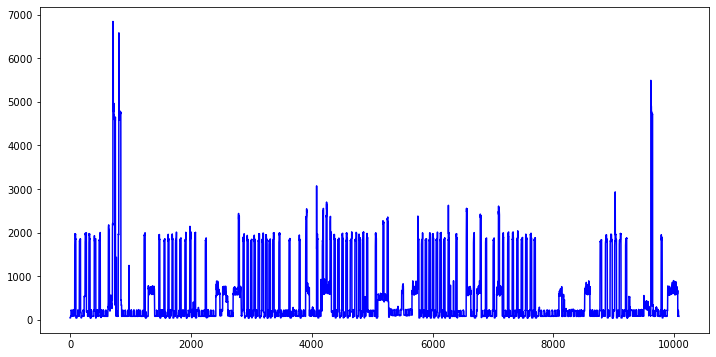

In [19]:
import ast
import sys
import json
import itertools
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal 
from copy import deepcopy
from hmmlearn.hmm import GaussianHMM
from collections import OrderedDict

""" --------------------- Fonctions ---------------------------"""

# Fonction pour trier les paramètres à partir de leur état le plus bas
def return_sorting_mapping(means):
    means_copy = deepcopy(means)
    means_copy = np.sort(means_copy, axis=0)
    
    # Trouver la correspondance
    mapping = {}
    for i, val in enumerate(means_copy):
        mapping[i] = np.where(val == means)[0][0]
    return mapping

def sort_startprob(mapping, startprob):
    num_elements = len(startprob)
    new_startprob = np.zeros(num_elements)
    for i in range(len(startprob)):
        new_startprob[i] = startprob[mapping[i]]
    return new_startprob

def sort_covars(mapping, covars):
    new_covars = np.zeros_like(covars)
    for i in range(len(covars)):
        new_covars[i] = covars[mapping[i]]
    return new_covars

def sort_transition_matrix(mapping, A):
    num_elements = len(A)
    A_new = np.zeros((num_elements, num_elements))
    for i in range(num_elements):
        for j in range(num_elements):
            A_new[i, j] = A[mapping[i], mapping[j]]
    return A_new

def sort_learnt_parameters(startprob, means, covars, transmat):
    mapping = return_sorting_mapping(means)
    means_new = np.sort(means, axis=0)
    startprob_new = sort_startprob(mapping, startprob)
    covars_new = sort_covars(mapping, covars)
    transmat_new = sort_transition_matrix(mapping, transmat)
    assert np.shape(means_new) == np.shape(means)
    assert np.shape(startprob_new) == np.shape(startprob)
    assert np.shape(transmat_new) == np.shape(transmat)
    
    return startprob_new, means_new, covars_new, transmat_new

def compute_A_fhmm(list_A):
    result = list_A[0]
    for i in range(len(list_A) - 1):
        result = np.kron(result, list_A[i + 1])
    return result

def compute_pi_fhmm(list_pi):
    result = list_pi[0]
    for i in range(len(list_pi) - 1):
        result = np.kron(result, list_pi[i + 1])
    return result

def compute_means_fhmm(list_means):
    states_combination = list(itertools.product(*list_means))
    num_combination = len(states_combination)
    means_stacked = np.array([sum(x) for x in states_combination])
    means = np.reshape(means_stacked, (num_combination, 1))
    cov = np.tile(5 * np.identity(1), (num_combination, 1, 1))
    
    return means, cov

def create_combined_fhmm(model):
    list_pi = [model[appliance].startprob_ for appliance in model]
    list_A = [model[appliance].transmat_ for appliance in model]
    list_means = [model[appliance].means_.flatten().tolist() for appliance in model]
    
    pi_combined = compute_pi_fhmm(list_pi)
    A_combined = compute_A_fhmm(list_A)
    means_combined, cov_combined = compute_means_fhmm(list_means)
    
    combined_model = GaussianHMM(n_components=len(pi_combined), covariance_type='full')
    combined_model.startprob_ = pi_combined 
    combined_model.transmat_ = A_combined
    combined_model.means_ = means_combined 
    combined_model.covars_ = cov_combined
    
    return combined_model

def decode_hmm(length_sequence, centroids, appliance_list, states):
    hmm_states = OrderedDict()
    hmm_power = OrderedDict()
    total_num_combinations = 1
    
    for appliance in appliance_list: 
        total_num_combinations *= len(centroids[appliance])
      
    for appliance in appliance_list:
        hmm_states[appliance] = np.zeros(length_sequence, dtype=np.int)
        hmm_power[appliance] = np.zeros(length_sequence)
    
    for i in range(length_sequence):
        factor = total_num_combinations
        
        for appliance in appliance_list:
            factor = factor // len(centroids[appliance])
            temp = int(states[i]) // factor
            hmm_states[appliance][i] = temp % len(centroids[appliance])
            hmm_power[appliance][i] = centroids[appliance][hmm_states[appliance][i]]
            
    return hmm_states, hmm_power

def disaggregate(combined_model, model, test_power):
    length = len(test_power)
    temp = test_power.reshape(length, 1)
    states = (combined_model.predict(temp))
    
    means = OrderedDict()
    for appliance in model: 
        means[appliance] = (model[appliance].means_.flatten().tolist())
        means[appliance].sort()
        
    decoded_states, decoded_power = decode_hmm(len(states), means, means.keys(), states)
    
    return decoded_power, decoded_states

# Lecture des données de test
try:
    data = pd.read_csv("./AMPds/test_ampds2.csv")
    test_power = data["Total"].values
except FileNotFoundError:
    print("Le fichier de données n'a pas été trouvé.")
    sys.exit(1)
except KeyError:
    print("La colonne 'Total' n'est pas présente dans les données.")
    sys.exit(1)

print(data.isnull().sum())

    # Définition du nombre d'états pour chaque appareil
state_appliances = OrderedDict([
    ('BME', 2), ('DWE', 3), ('FGE', 3), ('HPE', 2), ('TVE', 2)
])

# Initialisation des dictionnaires pour les paramètres des modèles
startprob, transmat, means, covars, model = [OrderedDict() for _ in range(5)]

# Fonction pour convertir une chaîne en tableau numpy
def str_to_array(s):
    return np.array(ast.literal_eval(s))


# Chargement des paramètres à partir du fichier 'trained_models.txt'
current_appliance = None
with open('trained_models.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            current_appliance = line[:-1]
            if current_appliance not in state_appliances:
                state_appliances[current_appliance] = None
        elif line.startswith('startprob:'):
            startprob[current_appliance] = str_to_array(line.split(': ')[1])
            if state_appliances[current_appliance] is None:
                state_appliances[current_appliance] = len(startprob[current_appliance])
        elif line.startswith('transmat:'):
            transmat[current_appliance] = str_to_array(line.split(': ')[1])
        elif line.startswith('means:'):
            means[current_appliance] = str_to_array(line.split(': ')[1])
        elif line.startswith('covars:'):
            covars[current_appliance] = str_to_array(line.split(': ')[1])

# Création des modèles HMM pour chaque appareil
for appliance in state_appliances:
    if appliance in startprob and appliance in transmat and appliance in means and appliance in covars:
        model[appliance] = GaussianHMM(n_components=state_appliances[appliance], covariance_type='full')
        model[appliance].startprob_ = startprob[appliance]
        model[appliance].transmat_ = transmat[appliance]
        model[appliance].means_ = means[appliance]
        model[appliance].covars_ = covars[appliance]
    else:
        print(f"Avertissement : données manquantes pour l'appareil {appliance}, cet appareil sera ignoré.")

# Filtrer les appareils pour lesquels nous avons réussi à charger les données
valid_appliances = [app for app in state_appliances if app in model]
        
         
# Réorganisation des paramètres appris
new_model = OrderedDict()
for appliance in model:
    startprob_new, means_new, covars_new, transmat_new = sort_learnt_parameters(
        startprob[appliance], means[appliance], covars[appliance], transmat[appliance])
    
    new_model[appliance] = GaussianHMM(n_components=startprob_new.size, covariance_type="full")
    new_model[appliance].startprob_ = startprob_new
    new_model[appliance].transmat_ = transmat_new
    new_model[appliance].means_ = means_new
    new_model[appliance].covars_ = covars_new

# Création du modèle combiné et désagrégation
combined_model = create_combined_fhmm(new_model)
predicted_power, predicted_states = disaggregate(combined_model, new_model, test_power)

# Calcul de la puissance totale prédite
predicted_total = np.sum([power for power in predicted_power.values()], axis=0)

# Construction de la chaîne pour l'affichage
buff = "\"power\" : {"
for appliance in predicted_power:
    buff += f"\"power{appliance}\" : {predicted_states[appliance].tolist()},"
buff = buff.rstrip(',') + "} }"


# Stocker le resultat dans un fichier texte
with open('result_models.txt', 'w') as f:
    f.write(buff)

# print(buff)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(test_power, label='Puissance Totale (Réelle)', color='blue')
for appliance in predicted_power:
    plt.fill_between(predicted_power[appliance], label=f'Puissance {appliance} (Prédite)', linestyle='-')

plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.title('Puissance Totale vs Puissance Prédite par Appareil')
plt.legend()
plt.grid(True)
plt.show()


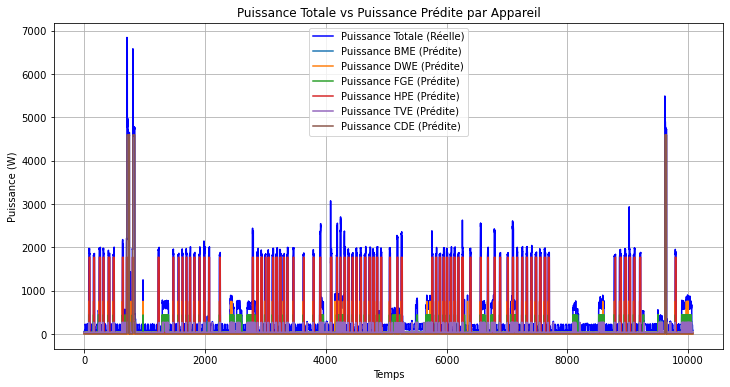

In [5]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(test_power, label='Puissance Totale (Réelle)', color='blue')
for appliance in predicted_power:
    plt.plot(predicted_power[appliance], label=f'Puissance {appliance} (Prédite)')  # Removed linestyle='--'

plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.title('Puissance Totale vs Puissance Prédite par Appareil')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Chargement des données réelles par appareil (à adapter selon votre structure de données)
true_power = {}
for appliance in valid_appliances:
    try:
        true_power[appliance] = pd.read_csv(f"./AMPds/Electricity_{appliance.upper()}.csv")["P"].values
    except FileNotFoundError:
        print(f"Fichier de données manquant pour l'appareil {appliance}.")
        true_power[appliance] = np.zeros(len(test_power))

# Calcul des métriques
for appliance in valid_appliances:
    y_true = true_power[appliance]
    y_pred = predicted_power[appliance]

    # Binarisation des données pour TP, TN, FP, FN
    threshold = 10  # à ajuster selon vos besoins
    y_true_binary = (y_true > threshold).astype(int)
    y_pred_binary = (y_pred > threshold).astype(int)

    TP = np.sum((y_pred_binary == 1) & (y_true_binary == 1))
    TN = np.sum((y_pred_binary == 0) & (y_true_binary == 0))
    FP = np.sum((y_pred_binary == 1) & (y_true_binary == 0))
    FN = np.sum((y_pred_binary == 0) & (y_true_binary == 1))

    # Calcul de la précision et du rappel
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # F1-measure
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # MAE (Mean Absolute Error)
    mae = np.mean(np.abs(y_true - y_pred))

    # MatchRate
    match_rate = (TP + TN) / (TP + TN + FP + FN)

    print(f"Métriques pour {appliance}:")
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    print(f"F1-measure: {f1:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MatchRate: {match_rate:.4f}\n")
    

ValueError: operands could not be broadcast together with shapes (10080,) (1051200,) 

Avertissement : données manquantes pour l'appareil UTE, cet appareil sera ignoré.


/tmp/ipykernel_4890/47285296.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hmm_states[appliance] = np.zeros(length_sequence, dtype=np.int)


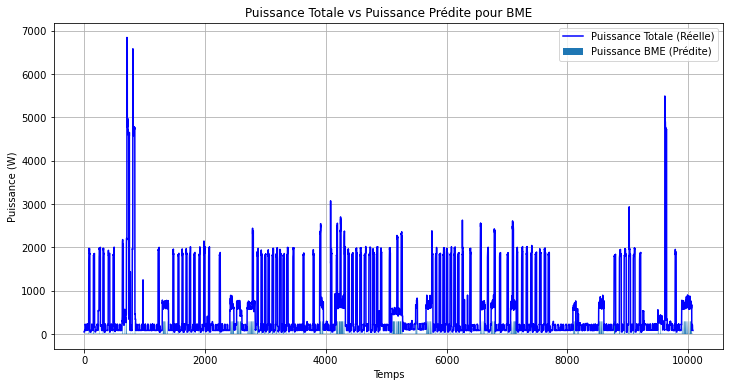

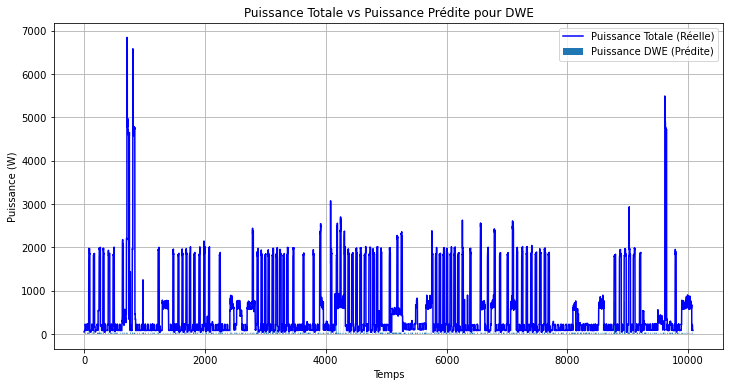

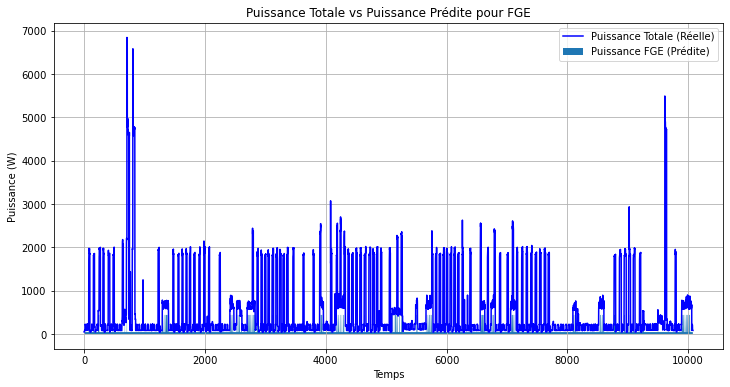

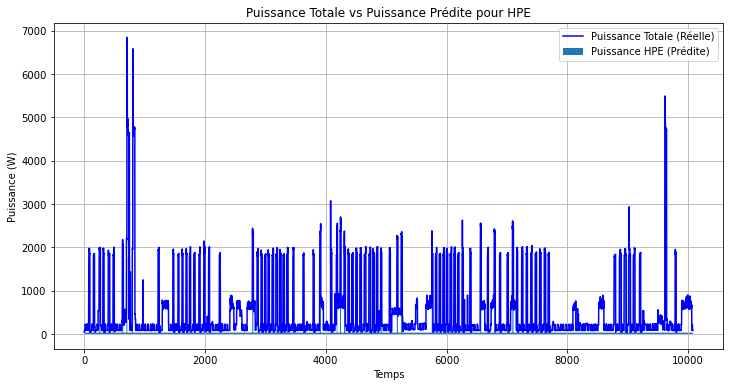

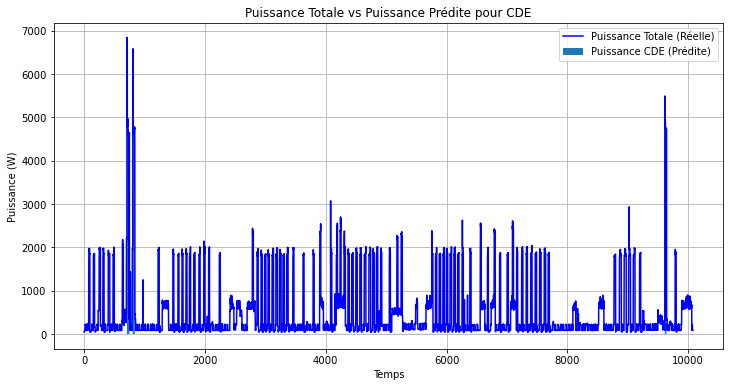

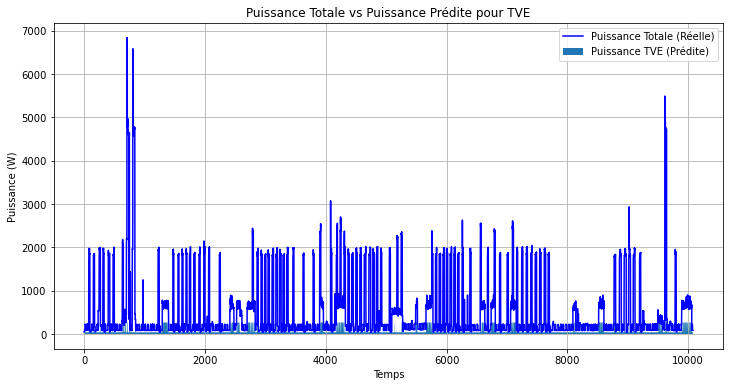

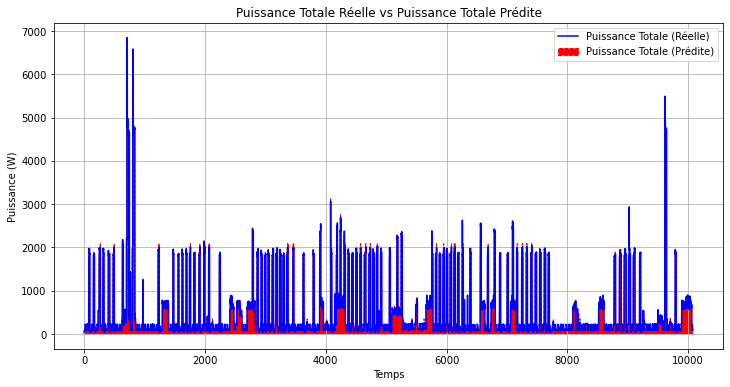

In [22]:
# Imports nécessaires
import ast
import seaborn as sns
import sys
import json
import itertools
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal 
from copy import deepcopy
from hmmlearn.hmm import GaussianHMM
from collections import OrderedDict

""" --------------------- Fonctions ---------------------------"""

# Fonction pour trier les paramètres à partir de leur état le plus bas
def return_sorting_mapping(means):
    means_copy = deepcopy(means)
    means_copy = np.sort(means_copy, axis=0)
    
    # Trouver la correspondance
    mapping = {}
    for i, val in enumerate(means_copy):
        mapping[i] = np.where(val == means)[0][0]
    return mapping

def sort_startprob(mapping, startprob):
    num_elements = len(startprob)
    new_startprob = np.zeros(num_elements)
    for i in range(len(startprob)):
        new_startprob[i] = startprob[mapping[i]]
    return new_startprob

def sort_covars(mapping, covars):
    new_covars = np.zeros_like(covars)
    for i in range(len(covars)):
        new_covars[i] = covars[mapping[i]]
    return new_covars

def sort_transition_matrix(mapping, A):
    num_elements = len(A)
    A_new = np.zeros((num_elements, num_elements))
    for i in range(num_elements):
        for j in range(num_elements):
            A_new[i, j] = A[mapping[i], mapping[j]]
    return A_new

def sort_learnt_parameters(startprob, means, covars, transmat):
    mapping = return_sorting_mapping(means)
    means_new = np.sort(means, axis=0)
    startprob_new = sort_startprob(mapping, startprob)
    covars_new = sort_covars(mapping, covars)
    transmat_new = sort_transition_matrix(mapping, transmat)
    assert np.shape(means_new) == np.shape(means)
    assert np.shape(startprob_new) == np.shape(startprob)
    assert np.shape(transmat_new) == np.shape(transmat)
    
    return startprob_new, means_new, covars_new, transmat_new

def compute_A_fhmm(list_A):
    result = list_A[0]
    for i in range(len(list_A) - 1):
        result = np.kron(result, list_A[i + 1])
    return result

def compute_pi_fhmm(list_pi):
    result = list_pi[0]
    for i in range(len(list_pi) - 1):
        result = np.kron(result, list_pi[i + 1])
    return result

def compute_means_fhmm(list_means):
    states_combination = list(itertools.product(*list_means))
    num_combination = len(states_combination)
    means_stacked = np.array([sum(x) for x in states_combination])
    means = np.reshape(means_stacked, (num_combination, 1))
    cov = np.tile(5 * np.identity(1), (num_combination, 1, 1))
    
    return means, cov

def create_combined_fhmm(model):
    list_pi = [model[appliance].startprob_ for appliance in model]
    list_A = [model[appliance].transmat_ for appliance in model]
    list_means = [model[appliance].means_.flatten().tolist() for appliance in model]
    
    pi_combined = compute_pi_fhmm(list_pi)
    A_combined = compute_A_fhmm(list_A)
    means_combined, cov_combined = compute_means_fhmm(list_means)
    
    combined_model = GaussianHMM(n_components=len(pi_combined), covariance_type='full')
    combined_model.startprob_ = pi_combined 
    combined_model.transmat_ = A_combined
    combined_model.means_ = means_combined 
    combined_model.covars_ = cov_combined
    
    return combined_model

def decode_hmm(length_sequence, centroids, appliance_list, states):
    hmm_states = OrderedDict()
    hmm_power = OrderedDict()
    total_num_combinations = 1
    
    for appliance in appliance_list: 
        total_num_combinations *= len(centroids[appliance])
      
    for appliance in appliance_list:
        hmm_states[appliance] = np.zeros(length_sequence, dtype=np.int)
        hmm_power[appliance] = np.zeros(length_sequence)
    
    for i in range(length_sequence):
        factor = total_num_combinations
        
        for appliance in appliance_list:
            factor = factor // len(centroids[appliance])
            temp = int(states[i]) // factor
            hmm_states[appliance][i] = temp % len(centroids[appliance])
            hmm_power[appliance][i] = centroids[appliance][hmm_states[appliance][i]]
            
    return hmm_states, hmm_power

def disaggregate(combined_model, model, test_power):
    length = len(test_power)
    temp = test_power.reshape(length, 1)
    states = (combined_model.predict(temp))
    
    means = OrderedDict()
    for appliance in model: 
        means[appliance] = (model[appliance].means_.flatten().tolist())
        means[appliance].sort()
        
    decoded_states, decoded_power = decode_hmm(len(states), means, means.keys(), states)
    
    return decoded_power, decoded_states

# Lecture des données de test
try:
    data = pd.read_csv("./AMPds/test_ampds2.csv")
    test_power = data["Total"].values
except FileNotFoundError:
    print("Le fichier de données n'a pas été trouvé.")
    sys.exit(1)
except KeyError:
    print("La colonne 'Total' n'est pas présente dans les données.")
    sys.exit(1)

# Définition du nombre d'états pour chaque appareil
state_appliances = OrderedDict([
    ('BME', 2), ('DWE', 3), ('FGE', 3), ('HPE', 2), ('UTE', 1)
])

# Initialisation des dictionnaires pour les paramètres des modèles
startprob, transmat, means, covars, model = [OrderedDict() for _ in range(5)]

# Fonction pour convertir une chaîne en tableau numpy
def str_to_array(s):
    return np.array(ast.literal_eval(s))


# Chargement des paramètres à partir du fichier 'trained_models.txt'
current_appliance = None
with open('trained_models.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            current_appliance = line[:-1]
            if current_appliance not in state_appliances:
                state_appliances[current_appliance] = None
        elif line.startswith('startprob:'):
            startprob[current_appliance] = str_to_array(line.split(': ')[1])
            if state_appliances[current_appliance] is None:
                state_appliances[current_appliance] = len(startprob[current_appliance])
        elif line.startswith('transmat:'):
            transmat[current_appliance] = str_to_array(line.split(': ')[1])
        elif line.startswith('means:'):
            means[current_appliance] = str_to_array(line.split(': ')[1])
        elif line.startswith('covars:'):
            covars[current_appliance] = str_to_array(line.split(': ')[1])

# Création des modèles HMM pour chaque appareil
for appliance in state_appliances:
    if appliance in startprob and appliance in transmat and appliance in means and appliance in covars:
        model[appliance] = GaussianHMM(n_components=state_appliances[appliance], covariance_type='full')
        model[appliance].startprob_ = startprob[current_appliance]
        model[appliance].transmat_ = transmat[current_appliance]
        model[appliance].means_ = means[current_appliance]
        model[appliance].covars_ = covars[current_appliance]
    else:
        print(f"Avertissement : données manquantes pour l'appareil {appliance}, cet appareil sera ignoré.")

# Filtrer les appareils pour lesquels nous avons réussi à charger les données
valid_appliances = [app for app in state_appliances if app in model]
        
         
# Réorganisation des paramètres appris
new_model = OrderedDict()
for appliance in model:
    startprob_new, means_new, covars_new, transmat_new = sort_learnt_parameters(
        startprob[appliance], means[appliance], covars[appliance], transmat[appliance])
    
    new_model[appliance] = GaussianHMM(n_components=startprob_new.size, covariance_type="full")
    new_model[appliance].startprob_ = startprob_new
    new_model[appliance].transmat_ = transmat_new
    new_model[appliance].means_ = means_new
    new_model[appliance].covars_ = covars_new

# Création du modèle combiné et désagrégation
combined_model = create_combined_fhmm(new_model)
predicted_power, predicted_states = disaggregate(combined_model, new_model, test_power)

# Calcul de la puissance totale prédite
predicted_total = np.sum([power for power in predicted_power.values()], axis=0)

# Construction de la chaîne pour l'affichage
buff = "\"power\" : {"
for appliance in predicted_power:
    buff += f"\"power{appliance}\" : {predicted_states[appliance].tolist()},"
buff = buff.rstrip(',') + "} }"

# Stocker le résultat dans un fichier texte
with open('result_models.txt', 'w') as f:
    f.write(buff)

# Tracé des graphes pour chaque appareil
for appliance in predicted_power:
    plt.figure(figsize=(12, 6))
    plt.plot(test_power, label='Puissance Totale (Réelle)', color='blue')
    plt.fill_between(range(predicted_power[appliance].shape[0]), predicted_power[appliance], label=f'Puissance {appliance} (Prédite)', linestyle='--')
    plt.xlabel('Temps')
    plt.ylabel('Puissance (W)')
    plt.title(f'Puissance Totale vs Puissance Prédite pour {appliance}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tracé de la puissance totale prédite vs réelle
plt.figure(figsize=(12, 6))
plt.plot(test_power, label='Puissance Totale (Réelle)', color='blue')
plt.fill_between(range(predicted_total.shape[0]), predicted_total, label='Puissance Totale (Prédite)', linestyle='--', color='red')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.title('Puissance Totale Réelle vs Puissance Totale Prédite')
plt.legend()
plt.grid(True)
plt.show()


Avertissement : données manquantes pour l'appareil UTE, cet appareil sera ignoré.


/tmp/ipykernel_4890/3046158166.py:108: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hmm_states[appliance] = np.zeros(length_sequence, dtype=np.int)


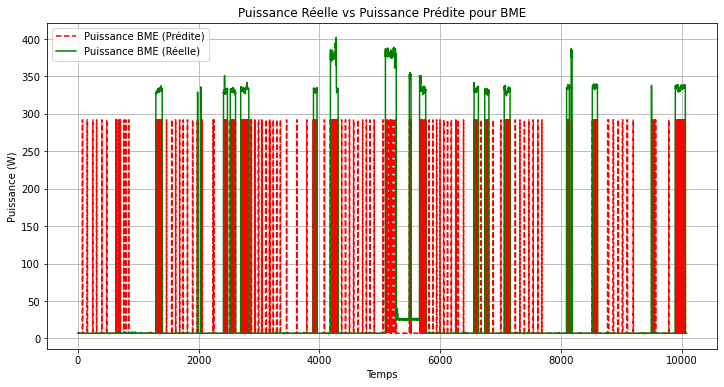

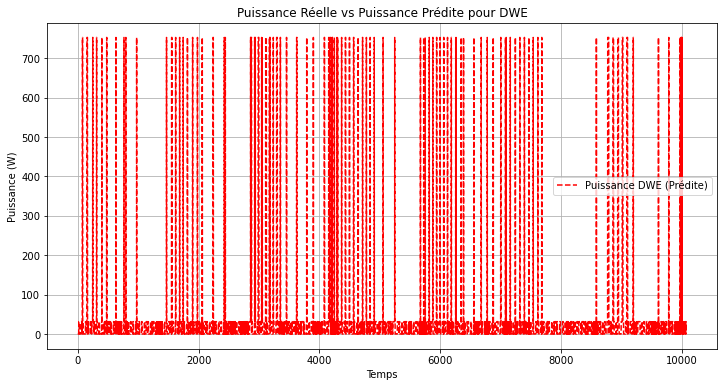

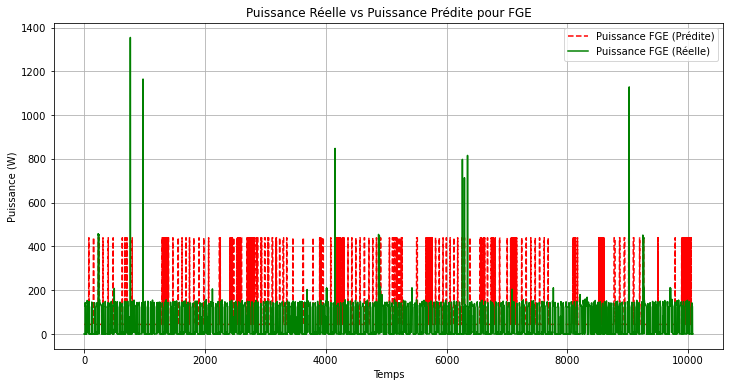

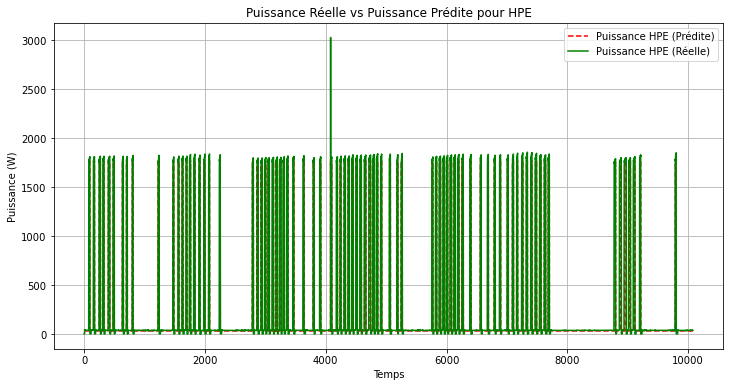

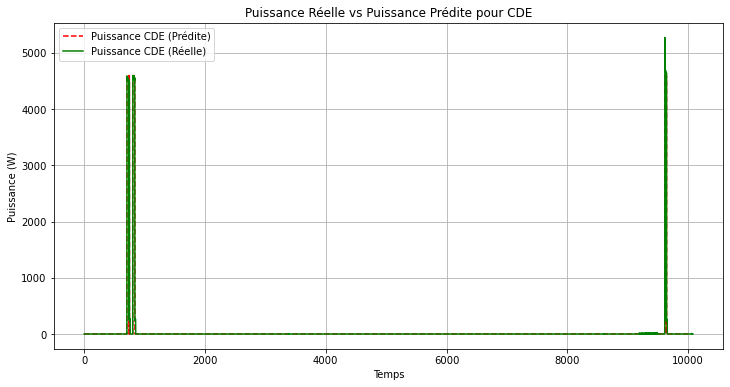

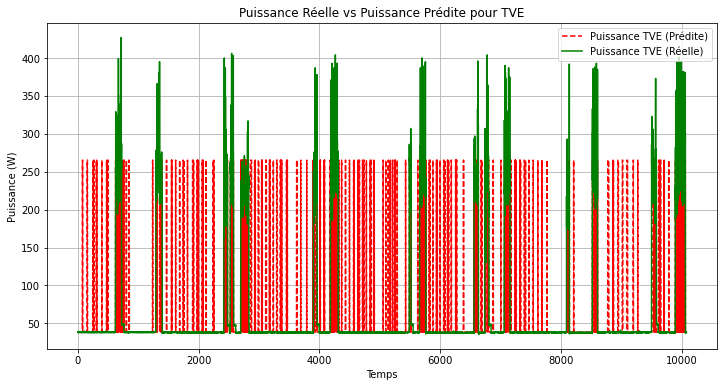

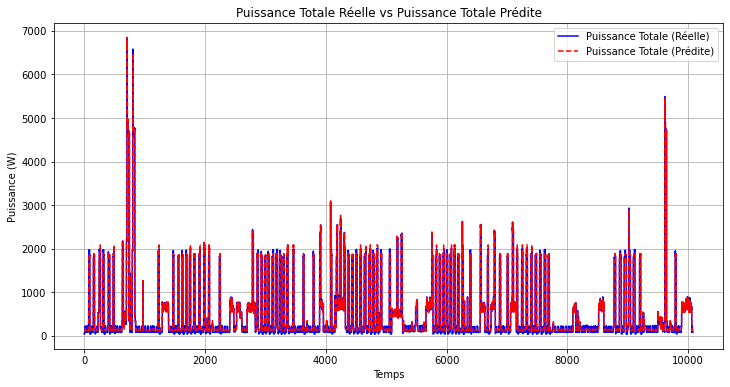

In [8]:
# Imports nécessaires
import ast
import sys
import json
import itertools
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal 
from copy import deepcopy
from hmmlearn.hmm import GaussianHMM
from collections import OrderedDict

""" --------------------- Fonctions ---------------------------"""

# Fonction pour trier les paramètres à partir de leur état le plus bas
def return_sorting_mapping(means):
    means_copy = deepcopy(means)
    means_copy = np.sort(means_copy, axis=0)
    
    # Trouver la correspondance
    mapping = {}
    for i, val in enumerate(means_copy):
        mapping[i] = np.where(val == means)[0][0]
    return mapping

def sort_startprob(mapping, startprob):
    num_elements = len(startprob)
    new_startprob = np.zeros(num_elements)
    for i in range(len(startprob)):
        new_startprob[i] = startprob[mapping[i]]
    return new_startprob

def sort_covars(mapping, covars):
    new_covars = np.zeros_like(covars)
    for i in range(len(covars)):
        new_covars[i] = covars[mapping[i]]
    return new_covars

def sort_transition_matrix(mapping, A):
    num_elements = len(A)
    A_new = np.zeros((num_elements, num_elements))
    for i in range(num_elements):
        for j in range(num_elements):
            A_new[i, j] = A[mapping[i], mapping[j]]
    return A_new

def sort_learnt_parameters(startprob, means, covars, transmat):
    mapping = return_sorting_mapping(means)
    means_new = np.sort(means, axis=0)
    startprob_new = sort_startprob(mapping, startprob)
    covars_new = sort_covars(mapping, covars)
    transmat_new = sort_transition_matrix(mapping, transmat)
    assert np.shape(means_new) == np.shape(means)
    assert np.shape(startprob_new) == np.shape(startprob)
    assert np.shape(transmat_new) == np.shape(transmat)
    
    return startprob_new, means_new, covars_new, transmat_new

def compute_A_fhmm(list_A):
    result = list_A[0]
    for i in range(len(list_A) - 1):
        result = np.kron(result, list_A[i + 1])
    return result

def compute_pi_fhmm(list_pi):
    result = list_pi[0]
    for i in range(len(list_pi) - 1):
        result = np.kron(result, list_pi[i + 1])
    return result

def compute_means_fhmm(list_means):
    states_combination = list(itertools.product(*list_means))
    num_combination = len(states_combination)
    means_stacked = np.array([sum(x) for x in states_combination])
    means = np.reshape(means_stacked, (num_combination, 1))
    cov = np.tile(5 * np.identity(1), (num_combination, 1, 1))
    
    return means, cov

def create_combined_fhmm(model):
    list_pi = [model[appliance].startprob_ for appliance in model]
    list_A = [model[appliance].transmat_ for appliance in model]
    list_means = [model[appliance].means_.flatten().tolist() for appliance in model]
    
    pi_combined = compute_pi_fhmm(list_pi)
    A_combined = compute_A_fhmm(list_A)
    means_combined, cov_combined = compute_means_fhmm(list_means)
    
    combined_model = GaussianHMM(n_components=len(pi_combined), covariance_type='full')
    combined_model.startprob_ = pi_combined 
    combined_model.transmat_ = A_combined
    combined_model.means_ = means_combined 
    combined_model.covars_ = cov_combined
    
    return combined_model

def decode_hmm(length_sequence, centroids, appliance_list, states):
    hmm_states = OrderedDict()
    hmm_power = OrderedDict()
    total_num_combinations = 1
    
    for appliance in appliance_list: 
        total_num_combinations *= len(centroids[appliance])
      
    for appliance in appliance_list:
        hmm_states[appliance] = np.zeros(length_sequence, dtype=np.int)
        hmm_power[appliance] = np.zeros(length_sequence)
    
    for i in range(length_sequence):
        factor = total_num_combinations
        
        for appliance in appliance_list:
            factor = factor // len(centroids[appliance])
            temp = int(states[i]) // factor
            hmm_states[appliance][i] = temp % len(centroids[appliance])
            hmm_power[appliance][i] = centroids[appliance][hmm_states[appliance][i]]
            
    return hmm_states, hmm_power

def disaggregate(combined_model, model, test_power):
    length = len(test_power)
    temp = test_power.reshape(length, 1)
    states = (combined_model.predict(temp))
    
    means = OrderedDict()
    for appliance in model: 
        means[appliance] = (model[appliance].means_.flatten().tolist())
        means[appliance].sort()
        
    decoded_states, decoded_power = decode_hmm(len(states), means, means.keys(), states)
    
    return decoded_power, decoded_states

# Lecture des données de test
try:
    data = pd.read_csv("./AMPds/test_ampds2.csv")
    test_power = data["Total"].values
except FileNotFoundError:
    print("Le fichier de données n'a pas été trouvé.")
    sys.exit(1)
except KeyError:
    print("La colonne 'Total' n'est pas présente dans les données.")
    sys.exit(1)

# Définition du nombre d'états pour chaque appareil
state_appliances = OrderedDict([
    ('BME', 2), ('DWE', 3), ('FGE', 3), ('HPE', 2), ('UTE', 1)
])

# Initialisation des dictionnaires pour les paramètres des modèles
startprob, transmat, means, covars, model = [OrderedDict() for _ in range(5)]

# Fonction pour convertir une chaîne en tableau numpy
def str_to_array(s):
    return np.array(ast.literal_eval(s))


# Chargement des paramètres à partir du fichier 'trained_models.txt'
current_appliance = None
with open('trained_models.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            current_appliance = line[:-1]
            if current_appliance not in state_appliances:
                state_appliances[current_appliance] = None
        elif line.startswith('startprob:'):
            startprob[current_appliance] = str_to_array(line.split(': ')[1])
            if state_appliances[current_appliance] is None:
                state_appliances[current_appliance] = len(startprob[current_appliance])
        elif line.startswith('transmat:'):
            transmat[current_appliance] = str_to_array(line.split(': ')[1])
        elif line.startswith('means:'):
            means[current_appliance] = str_to_array(line.split(': ')[1])
        elif line.startswith('covars:'):
            covars[current_appliance] = str_to_array(line.split(': ')[1])

# Création des modèles HMM pour chaque appareil
for appliance in state_appliances:
    if appliance in startprob and appliance in transmat and appliance in means and appliance in covars:
        model[appliance] = GaussianHMM(n_components=state_appliances[appliance], covariance_type='full')
        model[appliance].startprob_ = startprob[current_appliance]
        model[appliance].transmat_ = transmat[current_appliance]
        model[appliance].means_ = means[current_appliance]
        model[appliance].covars_ = covars[current_appliance]
    else:
        print(f"Avertissement : données manquantes pour l'appareil {appliance}, cet appareil sera ignoré.")

# Filtrer les appareils pour lesquels nous avons réussi à charger les données
valid_appliances = [app for app in state_appliances if app in model]
        
         
# Réorganisation des paramètres appris
new_model = OrderedDict()
for appliance in model:
    startprob_new, means_new, covars_new, transmat_new = sort_learnt_parameters(
        startprob[appliance], means[appliance], covars[appliance], transmat[appliance])
    
    new_model[appliance] = GaussianHMM(n_components=startprob_new.size, covariance_type="full")
    new_model[appliance].startprob_ = startprob_new
    new_model[appliance].transmat_ = transmat_new
    new_model[appliance].means_ = means_new
    new_model[appliance].covars_ = covars_new

# Création du modèle combiné et désagrégation
combined_model = create_combined_fhmm(new_model)
predicted_power, predicted_states = disaggregate(combined_model, new_model, test_power)

# Calcul de la puissance totale prédite
predicted_total = np.sum([power for power in predicted_power.values()], axis=0)

# Construction de la chaîne pour l'affichage
buff = "\"power\" : {"
for appliance in predicted_power:
    buff += f"\"power{appliance}\" : {predicted_states[appliance].tolist()},"
buff = buff.rstrip(',') + "} }"

# Stocker le résultat dans un fichier texte
with open('result_models.txt', 'w') as f:
    f.write(buff)

# Tracé de la puissance réelle et prédite pour chaque appareil
for appliance in predicted_power:
    plt.figure(figsize=(12, 6))
    plt.plot(predicted_power[appliance], label=f'Puissance {appliance} (Prédite)', linestyle='--', color='red')
    if appliance in data.columns:
        plt.plot(data[appliance].values, label=f'Puissance {appliance} (Réelle)', color='green')
    plt.xlabel('Temps')
    plt.ylabel('Puissance (W)')
    plt.title(f'Puissance Réelle vs Puissance Prédite pour {appliance}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tracé de la puissance totale réelle vs prédite
plt.figure(figsize=(12, 6))
plt.plot(test_power, label='Puissance Totale (Réelle)', color='blue')
plt.plot(predicted_total, label='Puissance Totale (Prédite)', linestyle='--', color='red')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.title('Puissance Totale Réelle vs Puissance Totale Prédite')
plt.legend()
plt.grid(True)
plt.show()


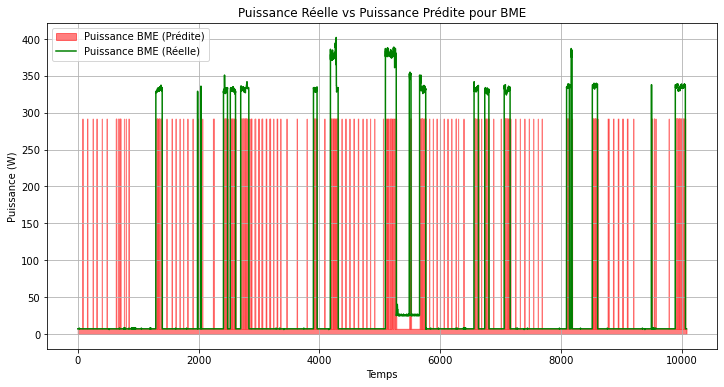

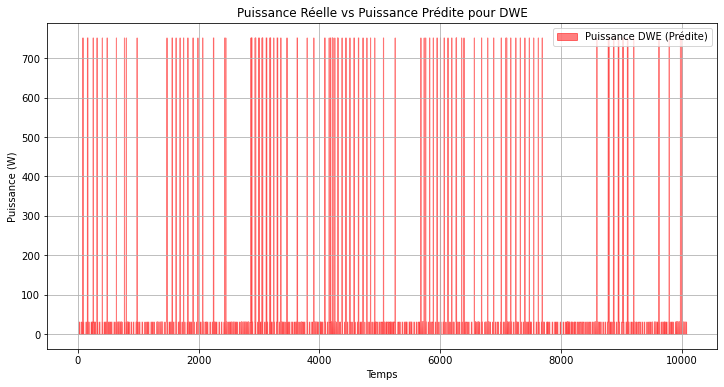

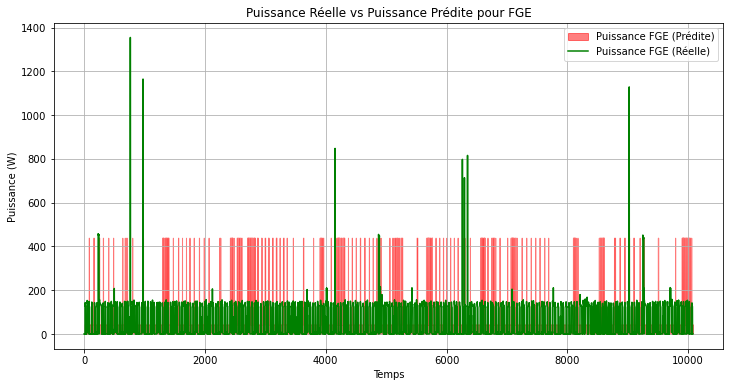

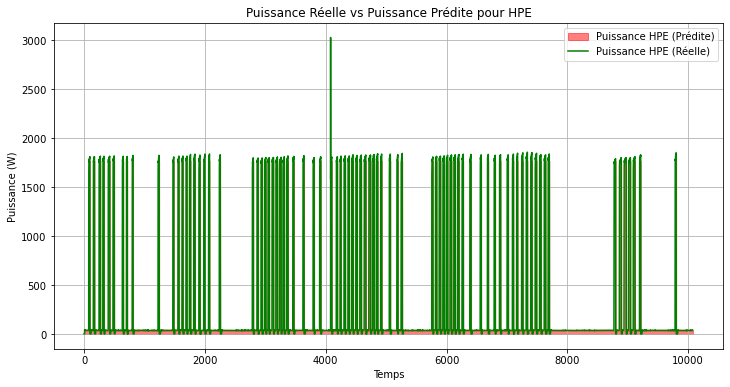

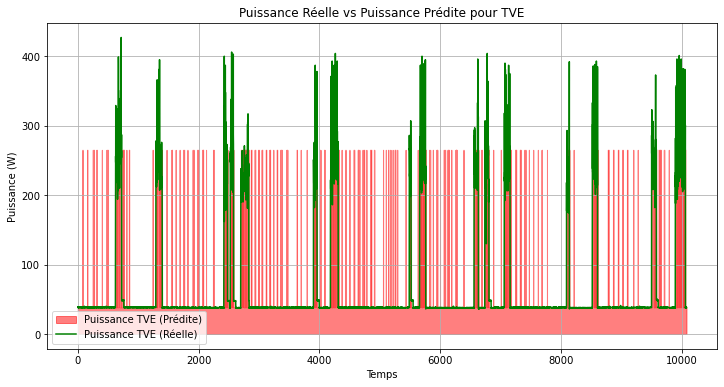

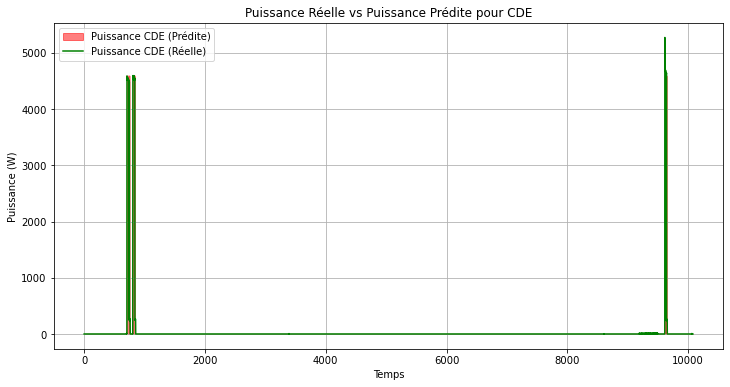

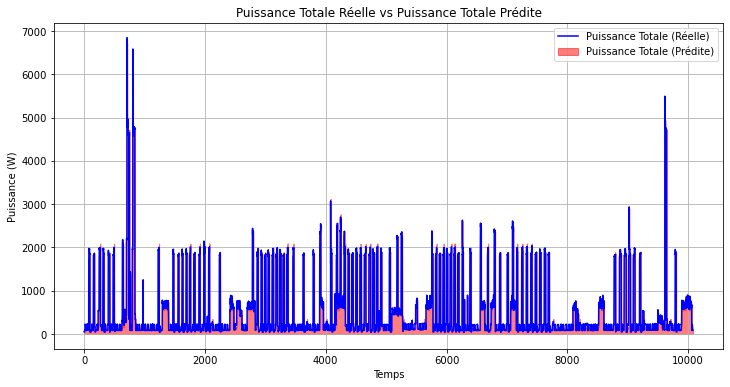

In [22]:
# Tracé de la puissance réelle et prédite pour chaque appareil
for appliance in predicted_power:
    plt.figure(figsize=(12, 6))
    plt.fill_between(range(len(predicted_power[appliance])), predicted_power[appliance], label=f'Puissance {appliance} (Prédite)', color='red', alpha=0.5)
    if appliance in data.columns:
        plt.plot(data[appliance].values, label=f'Puissance {appliance} (Réelle)', color='green')
    plt.xlabel('Temps')
    plt.ylabel('Puissance (W)')
    plt.title(f'Puissance Réelle vs Puissance Prédite pour {appliance}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tracé de la puissance totale réelle vs prédite
plt.figure(figsize=(12, 6))
plt.plot(test_power, label='Puissance Totale (Réelle)', color='blue')
plt.fill_between(range(len(predicted_total)), predicted_total, label='Puissance Totale (Prédite)', color='red', alpha=0.5)
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.title('Puissance Totale Réelle vs Puissance Totale Prédite')
plt.legend()
plt.grid(True)
plt.show()


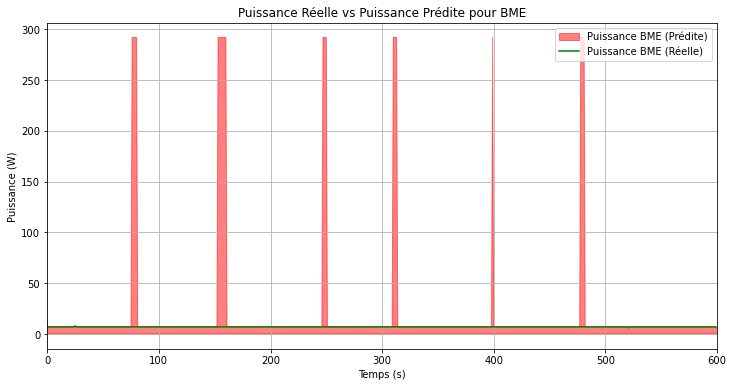

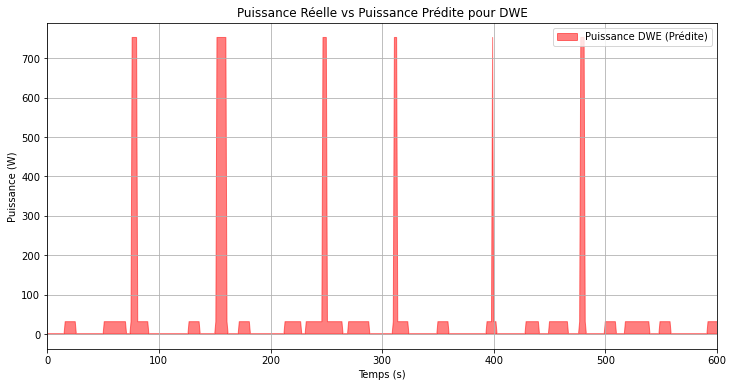

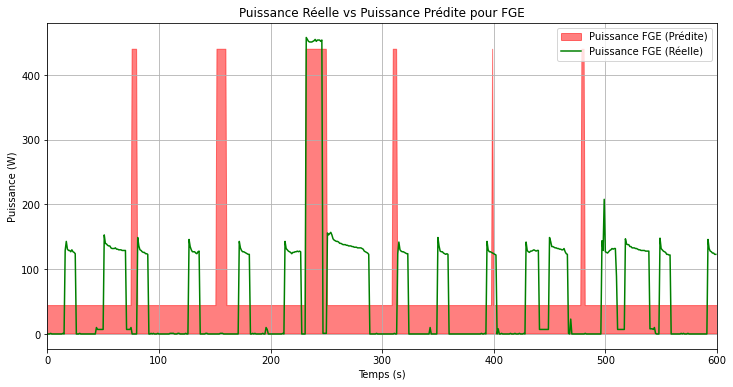

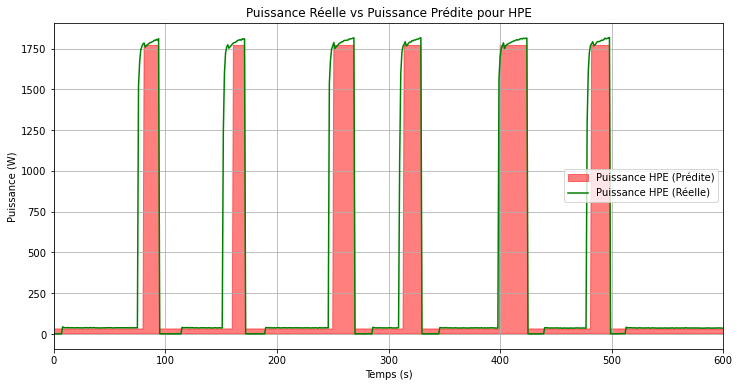

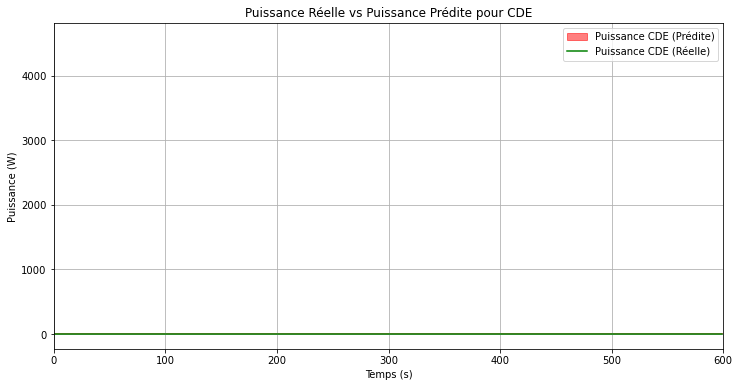

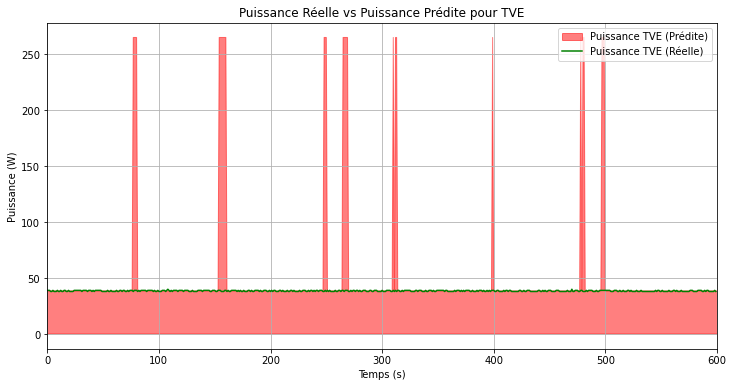

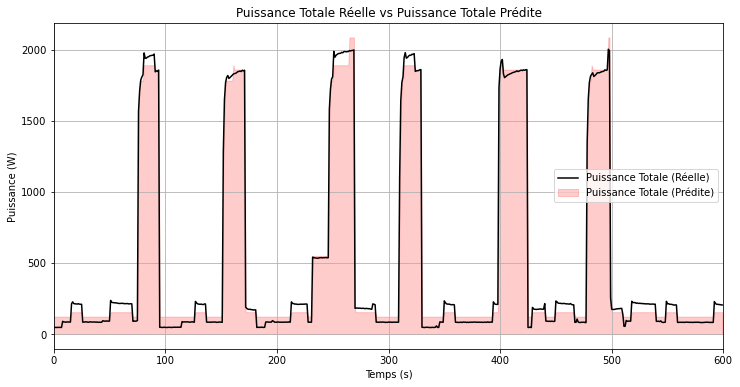

In [10]:
# Tracé de la puissance réelle et prédite pour chaque appareil
for appliance in predicted_power:
    plt.figure(figsize=(12, 6))
    plt.fill_between(np.arange(len(predicted_power[appliance])), predicted_power[appliance], label=f'Puissance {appliance} (Prédite)', color='red', alpha=0.5)
    if appliance in data.columns:
        plt.plot(data[appliance].values[:600], label=f'Puissance {appliance} (Réelle)', color='green')
    plt.xlabel('Temps (s)')
    plt.ylabel('Puissance (W)')
    plt.title(f'Puissance Réelle vs Puissance Prédite pour {appliance}')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 600)  # Limite l'échelle de l'axe des abscisses entre 0 et 600 secondes
    plt.show()

# Tracé de la puissance totale réelle vs prédite
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(test_power[:600])), test_power[:600], label='Puissance Totale (Réelle)', color='black')
plt.fill_between(np.arange(len(predicted_total[:600])), predicted_total[:600], label='Puissance Totale (Prédite)', color='red', alpha=0.2)
plt.xlabel('Temps (s)')
plt.ylabel('Puissance (W)')
plt.title('Puissance Totale Réelle vs Puissance Totale Prédite')
plt.legend()
plt.grid(True)
plt.xlim(0, 600)  # Limite l'échelle de l'axe des abscisses entre 0 et 600 secondes
plt.show()


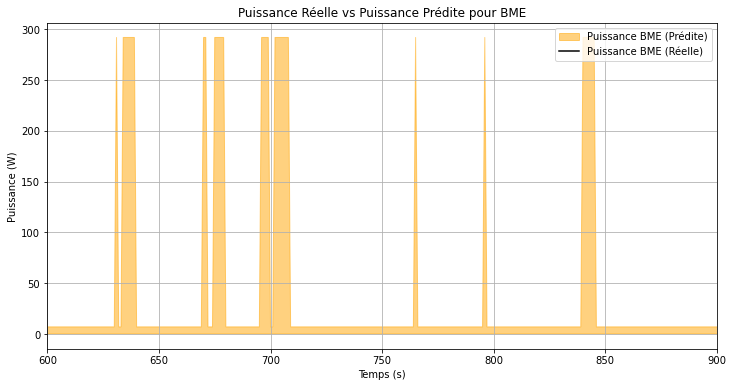

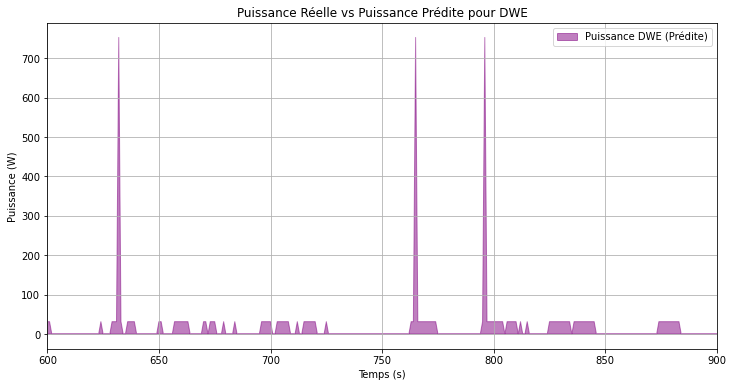

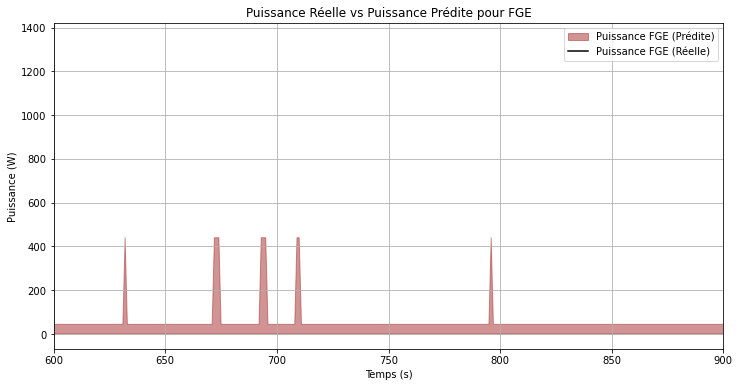

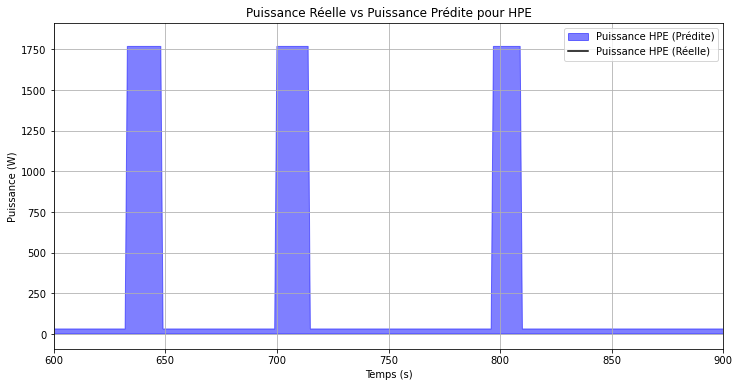

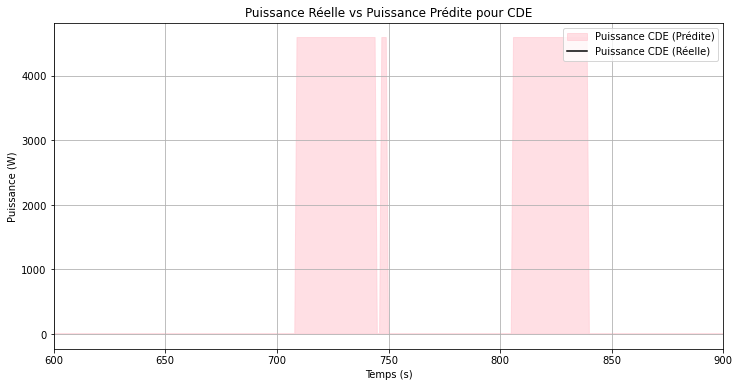

IndexError: list index out of range

<Figure size 864x432 with 0 Axes>

In [17]:
# Définition des couleurs pour les puissances prédites
predicted_colors = ['orange', 'purple', 'brown', 'blue', 'pink']

# Tracé de la puissance réelle et prédite pour chaque appareil
for i, appliance in enumerate(predicted_power):
    plt.figure(figsize=(12, 6))
    plt.fill_between(np.arange(len(predicted_power[appliance])), predicted_power[appliance], label=f'Puissance {appliance} (Prédite)', color=predicted_colors[i], alpha=0.5)
    if appliance in data.columns:
        plt.plot(data[appliance].values[600:900], label=f'Puissance {appliance} (Réelle)', color='black')
    plt.xlabel('Temps (s)')
    plt.ylabel('Puissance (W)')
    plt.title(f'Puissance Réelle vs Puissance Prédite pour {appliance}')
    plt.legend()
    plt.grid(True)
    plt.xlim(600, 900)  # Limite l'échelle de l'axe des abscisses entre 0 et 600 secondes
    plt.show()

# Tracé de la puissance totale réelle vs prédite
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(test_power[600:900])), test_power[600:900], label='Puissance Totale (Réelle)', color='blue')
plt.fill_between(np.arange(len(predicted_total[600:900])), predicted_total[600:900], label='Puissance Totale (Prédite)', color='red', alpha=0.5)
plt.xlabel('Temps (s)')
plt.ylabel('Puissance (W)')
plt.title('Puissance Totale Réelle vs Puissance Totale Prédite')
plt.legend()
plt.grid(True)
plt.xlim(600, 900)  # Limite l'échelle de l'axe des abscisses entre 0 et 600 secondes
plt.show()
